# **Tarea 1 Anexos**





## **Pregunta 2**

In [1]:
import numpy as np
import pandas as pd

In [3]:
data_dic = {'X1':[0,2,0,0,-1,1],'X2':[3,0,1,1,0,1],'X3':[0,0,3,2,1,1],'Y':['Rojo','Rojo','Rojo','Verde','Verde','Rojo']}

datos = pd.DataFrame(data_dic)
datos

,X1,X2,X3,Y
0,0,3,0,Rojo
1,2,0,0,Rojo
2,0,1,3,Rojo
3,0,1,2,Verde
4,-1,0,1,Verde
5,1,1,1,Rojo


In [4]:
# Calculo distancia Euclidiana respecto a X1=X2=X3=0
datos['DistEucl'] = np.sqrt(datos['X1'].apply(lambda x: (x-0)**2)+datos['X2'].apply(lambda x: (x-0)**2)+datos['X3'].apply(lambda x: (x-0)**2))
datos
print(datos.to_latex(index=False))

\begin{tabular}{rrrlr}
\toprule
 X1 &  X2 &  X3 &      Y &  DistEucl \\
\midrule
  0 &   3 &   0 &   Rojo &  3.000000 \\
  2 &   0 &   0 &   Rojo &  2.000000 \\
  0 &   1 &   3 &   Rojo &  3.162278 \\
  0 &   1 &   2 &  Verde &  2.236068 \\
 -1 &   0 &   1 &  Verde &  1.414214 \\
  1 &   1 &   1 &   Rojo &  1.732051 \\
\bottomrule
\end{tabular}



In [7]:
# Ordenar los datos de forma creciente
new_datos = datos.sort_values('DistEucl')
new_datos

,X1,X2,X3,Y,DistEucl
4,-1,0,1,Verde,1.414214
5,1,1,1,Rojo,1.732051
1,2,0,0,Rojo,2.000000
3,0,1,2,Verde,2.236068
0,0,3,0,Rojo,3.000000
2,0,1,3,Rojo,3.162278


In [8]:
# Prediccion con K = 1 y K = 3
K = np.array([1,3])
Prediccion = pd.DataFrame({'X1':[],'X2':[],'X3':[],'K':[],'Y':[]})
for i in K:
  datosK = new_datos[0:i]
  Y = ((datosK['Y'].value_counts())/i).idxmax()
  Prediccion = Prediccion.append(pd.Series([0,0,0,i,Y],index=['X1','X2','X3','K','Y']),ignore_index=True)
pd.options.display.float_format = '{:,.0f}'.format
Prediccion

,X1,X2,X3,K,Y
0,0,0,0,1,Verde
1,0,0,0,3,Rojo


## **Pregunta 3**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [ ]:
# Importar los datos
dataset = pd.read_csv('gustos_musicales.txt', sep=",",index_col=0,skipinitialspace = True)
mapping = {'si': 1, 'no': 0}
for i in dataset.columns[0:-1]:
  dataset = dataset.replace({i: mapping})

In [ ]:
# Definir conjuntos de valores 
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# Crear el modelo de Bayes ingenuo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predecir el valor de un X con el modelo ajustado
X_test1 = np.array([[1,1,1,0,1,1,0,1,1,1]])
y_pred  =  classifier.predict(X_test1)
print(y_pred)

[0]


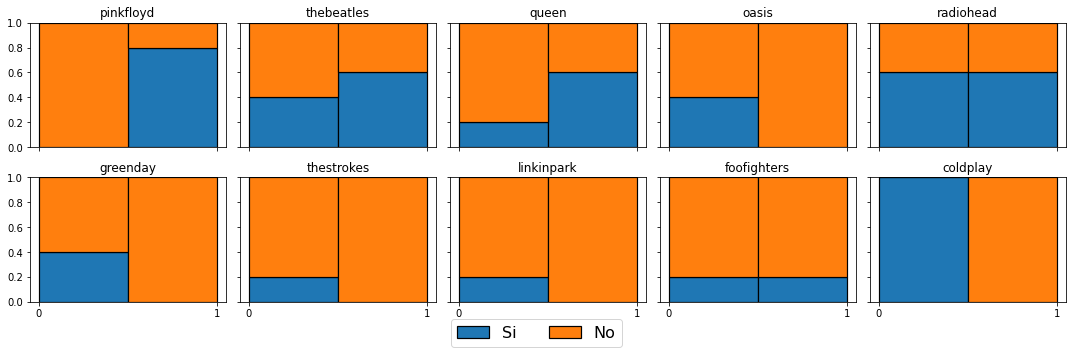

<Figure size 432x288 with 0 Axes>

In [ ]:
# Graficar las distribuciones marginales
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5,sharex=True,sharey=True,figsize=(15,5))
m = 0
for i in dataset.columns[0:-1]:
  data1 = dataset[dataset[i] == 1]['etiqueta']
  data0 = dataset[dataset[i] == 0]['etiqueta']
  if m <5:
    axs[0,m].hist([data1.values,data0.values],bins=2,stacked=True,edgecolor='black', linewidth=1.2,density=True)
    axs[0,m].set_title(i)
    m = m+1
  else:
    axs[1,m-5].hist([data1.values,data0.values],bins=2,stacked=True,edgecolor='black', linewidth=1.2,density=True)
    axs[1,m-5].set_title(i)
    axs[1,m-5].set_xticks(np.arange(0, 1.1, step=1))
    m = m+1
#plt.yticks([])
fig.tight_layout() 
fig.subplots_adjust(bottom=0.15)   ##  Need to play with this number.
fig.legend(labels=["Si", "No"], loc="lower center", ncol=4, prop={'size': 16}) 
plt.show()  
plt.savefig('hist.pdf') 

In [ ]:
# Ajustar modelo binomial
from scipy.stats import binom
n = dataset.shape[0]
for j in range(n):
  X_test = X[j,:]
  n1 = len(np.where(y==1)[0])
  n0 = len(np.where(y==0)[0])
  theta1 = n1/n
  theta0 = n0/n
  p1 = np.empty((1,10))
  p0 = np.empty((1,10))
  for i in range(len(dataset.columns[0:-1])):
    n11 = len(np.intersect1d(np.where(X[:,i]==1),np.where(y==1)))
    p1[0,i] = binom.pmf(X_test[i],1,n11/n1)
    n10 = len(np.intersect1d(np.where(X[:,i]==1),np.where(y==0)))
    p0[0,i] = binom.pmf(X_test[i],1,n10/n0)
  h1 = theta1*np.prod(p1)  
  h0 = theta0*np.prod(p0)
  if h1>h0:
    Pred = 1
  else:
    Pred = 0
  print(Pred)

0
0
0
0
0
1
1
1
1
1


In [ ]:
# Clasificacion segun gustos musicales propios
X_test = X_test1[0]
p1 = np.empty((1,10))
p0 = np.empty((1,10))
for i in range(len(dataset.columns[0:-1])):
  n11 = len(np.intersect1d(np.where(X[:,i]==1),np.where(y==1)))
  p1[0,i] = binom.pmf(X_test[i],1,n11/n1)
  n10 = len(np.intersect1d(np.where(X[:,i]==1),np.where(y==0)))
  p0[0,i] = binom.pmf(X_test[i],1,n10/n0)
h1 = theta1*np.prod(p1)  
h0 = theta0*np.prod(p0)
if h1>h0:
  Pred = 1
else:
  Pred = 0
  print(Pred)

0


## **Pregunta 4**

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importar datos
df = pd.read_csv('datos_heart_disease.txt', sep=",",index_col=0,skipinitialspace = True)
mapping = {'Present': 1, 'Absent': 0}
df = df.replace({'famhist': mapping})
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12,6,23,1,49,25,97,52,1
2,144,0,4,29,0,55,29,2,63,1
3,118,0,3,32,1,52,29,4,46,0
4,170,8,6,38,1,51,32,24,58,1
5,134,14,4,28,1,60,26,57,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0,6,32,0,64,28,0,58,0
460,182,4,4,32,0,52,29,19,52,1
461,108,3,2,15,0,40,20,27,55,0


In [ ]:
# Crear modelo logit y aplicar test de Wald
cov = ['sbp','tobacco','ldl','famhist','obesity','alcohol','age']
labels = cov.copy()
labels[0] = 'chd ~ '+labels[0]
aux = '+'.join(labels)
model = smf.glm(aux, data = df, family = sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      454
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -241.59
Date:                Tue, 05 Oct 2021   Deviance:                       483.17
Time:                        20:14:10   Pearson chi2:                     459.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1296      0.964     -4.283      0.0

In [ ]:
# Eliminar covariable menos significativa 1
label = abs(result.tvalues).idxmin()
print('Eliminar covariable menos significativa: ',label)
cov.remove(label)
labels = cov.copy()
labels[0] = 'chd ~ '+labels[0]
aux = '+'.join(labels)
model = smf.glm(aux, data = df, family = sm.families.Binomial())
result = model.fit()
print(result.summary())

Eliminar covariable menos significativa:  alcohol
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      455
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -241.60
Date:                Tue, 05 Oct 2021   Deviance:                       483.19
Time:                        20:14:10   Pearson chi2:                     458.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
In

In [ ]:
# Eliminar covariable menos significativa 2
label = abs(result.tvalues).idxmin()
print('Eliminar covariable menos significativa: ',label)
cov.remove(label)
labels = cov.copy()
labels[0] = 'chd ~ '+labels[0]
aux = '+'.join(labels)
model = smf.glm(aux, data = df, family = sm.families.Binomial())
result = model.fit()
print(result.summary())

Eliminar covariable menos significativa:  sbp
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      456
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.15
Date:                Tue, 05 Oct 2021   Deviance:                       484.30
Time:                        20:14:10   Pearson chi2:                     457.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

In [ ]:
# Eliminar covariable menos significativa 3
label = abs(result.tvalues).idxmin()
print('Eliminar covariable menos significativa: ',label)
cov.remove(label)
labels = cov.copy()
labels[0] = 'chd ~ '+labels[0]
aux = '+'.join(labels)
model = smf.glm(aux, data = df, family = sm.families.Binomial())
result = model.fit()
print(result.summary())

Eliminar covariable menos significativa:  obesity
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      457
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.72
Date:                Tue, 05 Oct 2021   Deviance:                       485.44
Time:                        20:14:10   Pearson chi2:                     460.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
In

In [ ]:
# Covariables que sobreviven
print('Covariables que sobreviven:',cov)

Covariables que sobreviven: ['tobacco', 'ldl', 'famhist', 'age']
